In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from attr import dataclass
from scipy.misc import dataset_methods

sns.set_theme()
sns.set_style("whitegrid")

base_path = f"{os.environ["OneDrive"]}/Data Science Project Idea 31"


In [2]:
combined_data = pd.read_csv(f"{base_path}/combined.csv")
combined_data.describe()


,ID,NativeAmerican,Asian,Black,Hispanic,Multiracial,PacificIslander,White,LowIncome,layout_type,Distance_to_freeway,Street_100,Street_200,Street_300m,PercentTree,air_quality
count,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.000000,8420.00000,8420.000000,8420.000000,8420.000000,8420.000000
mean,5.514133,0.012013,0.018153,0.039224,0.127051,0.154201,0.035299,0.612126,0.731945,0.504276,1352.552173,512.33981,1981.381532,4818.788432,59.903361,12.899240
std,2.882118,0.007514,0.012430,0.027318,0.027331,0.028394,0.030033,0.111732,0.179560,0.500011,1087.718972,191.32855,528.145460,867.700213,21.487608,27.843341
min,1.000000,0.000000,0.000000,0.010000,0.090000,0.110000,0.000000,0.440000,0.380000,0.000000,221.500000,348.90000,1347.400000,3550.200000,31.000000,0.000000
25%,3.000000,0.010000,0.010000,0.020000,0.110000,0.130000,0.000000,0.500000,0.620000,0.000000,397.400000,405.90000,1485.100000,4244.000000,38.300000,2.190000
50%,6.000000,0.010000,0.030000,0.040000,0.130000,0.160000,0.050000,0.610000,0.840000,1.000000,976.600000,447.70000,1882.200000,4561.600000,51.500000,5.915000
75%,8.000000,0.020000,0.030000,0.050000,0.160000,0.180000,0.050000,0.720000,0.850000,1.000000,2328.200000,526.20000,2288.500000,5550.400000,84.100000,14.720000
max,10.000000,0.020000,0.030000,0.110000,0.170000,0.190000,0.080000,0.790000,0.910000,1.000000,3664.600000,1012.70000,3006.000000,6682.000000,89.100000,564.130000


In [7]:
from scipy import stats

extremes = combined_data[np.abs(stats.zscore(combined_data["air_quality"])) >= 3]
extremes.describe()

,ID,NativeAmerican,Asian,Black,Hispanic,Multiracial,PacificIslander,White,LowIncome,layout_type,Distance_to_freeway,Street_100,Street_200,Street_300m,PercentTree,air_quality
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.563636,0.011909,0.018364,0.039545,0.127000,0.153909,0.034545,0.613364,0.724182,0.481818,1284.266364,503.840000,1949.834545,4759.376364,60.547273,205.330364
std,2.868773,0.007722,0.012600,0.028555,0.028107,0.029401,0.030938,0.116637,0.183330,0.501956,1081.377984,190.165378,502.626333,807.356205,21.749933,103.334036
min,1.000000,0.000000,0.000000,0.010000,0.090000,0.110000,0.000000,0.440000,0.380000,0.000000,221.500000,348.900000,1347.400000,3550.200000,31.000000,97.200000
25%,3.000000,0.010000,0.010000,0.020000,0.110000,0.130000,0.000000,0.500000,0.620000,0.000000,397.400000,405.900000,1485.100000,4244.000000,38.300000,138.617500
50%,5.500000,0.010000,0.030000,0.040000,0.120000,0.160000,0.050000,0.630000,0.830000,0.000000,976.600000,437.700000,1882.200000,4561.600000,60.550000,158.000000
75%,8.000000,0.020000,0.030000,0.050000,0.160000,0.180000,0.050000,0.720000,0.850000,1.000000,2328.200000,526.200000,2288.500000,5550.400000,84.100000,249.567500
max,10.000000,0.020000,0.030000,0.110000,0.170000,0.190000,0.080000,0.790000,0.910000,1.000000,3664.600000,1012.700000,3006.000000,6682.000000,89.100000,564.130000


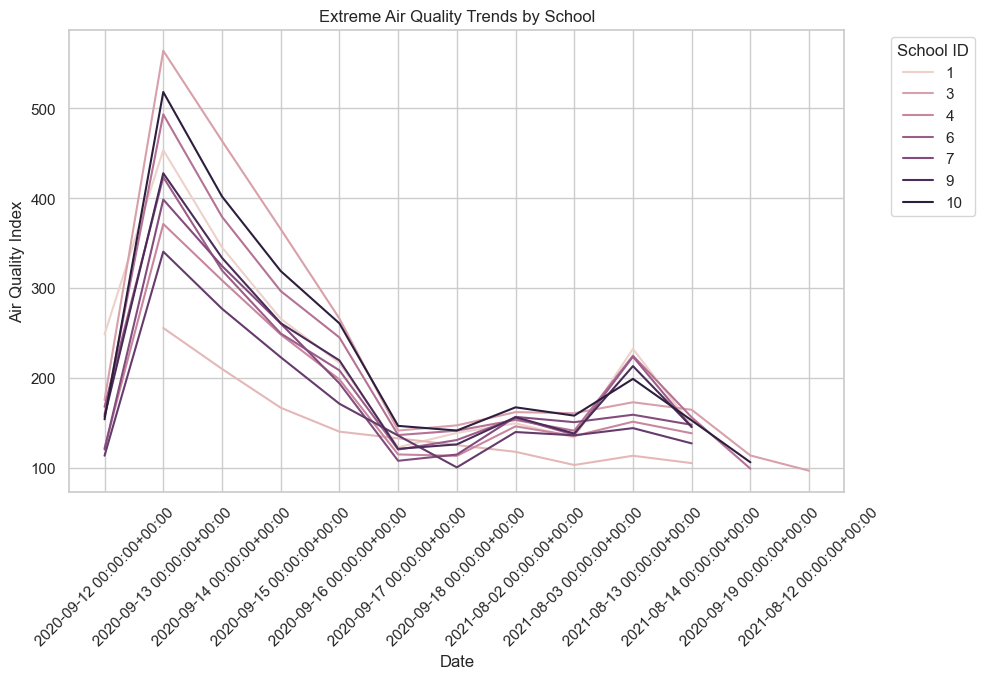

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=extremes, x='Time..UTC.00.00.', y='air_quality', hue='ID')
plt.title('Extreme Air Quality Trends by School')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.xticks(rotation=45)
plt.legend(title='School ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

